### Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def eval_model_reg2(X, y, iterations, alpha, lambda_):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]

    W_1 = []
    W_2 = []
    W_3 = []
    W_4 = []
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W)
        if i % (iterations / 10) == 0:
            print(i, W, err)
            W_1.append(W[0])
            W_2.append(W[1])
            W_3.append(W[2])
            W_4.append(W[3])

    fig = plt.figure()

    ax_1 = fig.add_subplot(1, 4, 1)
    ax_2 = fig.add_subplot(1, 4, 2)
    ax_3 = fig.add_subplot(1, 4, 3)
    ax_4 = fig.add_subplot(1, 4, 4)

    ax_1.set(title = 'W_1', xlim=(0, 0.002), ylim=(min(W_1), max(W_1)))
    ax_2.set(title = 'W_2', xlim=(0, 0.002), ylim=(min(W_2), max(W_2)))
    ax_3.set(title = 'W_3', xlim=(0, 0.002), ylim=(min(W_3), max(W_3)))
    ax_4.set(title = 'W_4', xlim=(0, 0.002), ylim=(min(W_4), max(W_4)))

    ax_1.scatter([lambda_]*len(W_1), y=W_1)
    ax_2.scatter([lambda_]*len(W_2), y=W_2)
    ax_3.scatter([lambda_]*len(W_3), y=W_3)
    ax_4.scatter([lambda_]*len(W_4), y=W_4)

    return W

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

100 [10.81977943  1.29188479  1.98326638  2.85123887] 2248.174495966113
200 [19.26820475  2.14025079  2.73257885  3.60272972] 1510.52005056178
300 [26.18241951  2.65414327  3.14578694  4.02368617] 1022.7641434294361
400 [31.84103209  2.97547956  3.36642337  4.25535143] 698.0693104166692
500 [36.47205635  3.18570474  3.47683987  4.37875637] 481.1820474779943
600 [40.26209948  3.33156577  3.52428387  4.44038363] 336.04984524294935
700 [43.36388132  3.43990014  3.53586071  4.46689313] 238.83798105676902
800 [45.90238819  3.52612135  3.5271187   4.47357128] 173.6837312142624
900 [47.97990927  3.59908764  3.50697503  4.46917888] 129.99460131981886
1000 [49.68015829  3.66389563  3.48054215  4.45873282] 100.68542522258227


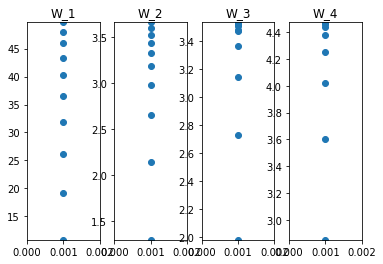

In [61]:
lambda_ = 0.001
X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])
W = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=lambda_)

### Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Если применять сперва нормализацию, а затем стандартизацию, то смысла нет (вроде...).
А вот если хотим получить из одного признака два: feature -> feature_std и feature_norm, то это рабочий вариант.

### *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [63]:
def eval_model_reg1(X, y, iterations, alpha, lambda_):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]

    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * abs(W))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [64]:
lambda_ = 0.001
X_st = X.copy().astype(np.float64)
X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])
W = eval_model_reg1(X_st, y, iterations=1000, alpha=1e-3, lambda_=lambda_)

100 [10.82031926  1.29192036  1.98337578  2.85143449] 2248.121639806013
200 [19.270033    2.14036214  2.73282431  3.60314606] 1510.377152522812
300 [26.18599516  2.6543227   3.14614835  4.02430243] 1022.5379422660177
400 [31.84660498  2.97570669  3.3668683   4.25613478] 697.7823588689173
500 [36.47972801  3.18595996  3.47733713  4.37967533] 480.85963084927107
600 [40.27186873  3.33183446  3.52480779  4.44141226] 335.7142303148755
700 [43.37567823  3.44017314  3.53639156  4.46801143] 238.5064123951739
800 [45.91609908  3.526394    3.5276418   4.47476426] 173.36828293358906
900 [47.99539491  3.59935867  3.5074795   4.47043543] 129.70285085904794
1000 [49.69726691  3.66416608  3.48101986  4.46004461] 100.42139697610136
